<a href="https://colab.research.google.com/github/superahxd/sec1_project/blob/main/sec1_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#💥GOAL

다음 분기에 어떤 게임을 설계해야 할까

1. 지역에 따라서 선호하는 게임 장르가 다를까
2. 연도별 게임의 트렌드가 있을까
3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

# 🕹️ Data Description
Name : 게임의 이름입니다.

Platform : 게임이 지원되는 플랫폼의 이름입니다.

Year : 게임이 출시된 연도입니다.

Genre : 게임의 장르입니다.

Publisher : 게임을 제작한 회사입니다.

NA_Sales : 북미지역에서의 출고량입니다.

EU_Sales : 유럽지역에서의 출고량입니다.

JP_Sales : 일본지역에서의 출고량입니다.

Other_Sales : 기타지역에서의 출고량입니다.

In [207]:
import pandas as pd
import numpy as np

vgames = pd.read_csv('/content/vgames2.csv')

In [208]:
vgames.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [209]:
vgames=vgames.replace('N/A',np.nan)
vgames=vgames.dropna()

In [210]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    return float(x)


vgames['NA_Sales']=vgames['NA_Sales'].apply(value_to_float)
vgames['EU_Sales']=vgames['EU_Sales'].apply(value_to_float)
vgames['JP_Sales']=vgames['JP_Sales'].apply(value_to_float)
vgames['Other_Sales']=vgames['Other_Sales'].apply(value_to_float)

In [211]:
def million(x):
 if x <= 100:
   return x * 1000000.0
 else: return x

vgames['NA_Sales']=vgames['NA_Sales'].apply(million)
vgames['EU_Sales']=vgames['EU_Sales'].apply(million)
vgames['JP_Sales']=vgames['JP_Sales'].apply(million)
vgames['Other_Sales']=vgames['Other_Sales'].apply(million)

In [212]:
def division(x):
  if x > 0:
    return x / 1000
  else: return x

vgames['NA_Sales']=vgames['NA_Sales'].apply(division)
vgames['EU_Sales']=vgames['EU_Sales'].apply(division)
vgames['JP_Sales']=vgames['JP_Sales'].apply(division)
vgames['Other_Sales']=vgames['Other_Sales'].apply(division)

In [213]:
def year(x):
  if x >= 80 and x <= 100:
   return x + 1900
  elif x < 80:
   return x + 2000
  else : return float(x)

vgames['Year']=vgames['Year'].apply(year)

In [214]:
vgames=vgames.iloc[:,1:]
vgames

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40.0,0.0,0.0,0.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170.0,0.0,0.0,10.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20.0,0.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120.0,90.0,0.0,40.0
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,150.0,40.0,0.0,10.0
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,10.0,0.0,0.0,0.0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,440.0,190.0,30.0,130.0
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,50.0,50.0,250.0,30.0


1. 🌏지역에 따른 게임 장르 선호도

지역에 따라서 선호하는 게임 장르가 다를까



In [215]:
import matplotlib.pyplot as plt
import numpy as np

In [216]:
vgames['Genre'] = vgames['Genre'].dropna()
vgames_1=vgames.iloc[:,3:]
vgames_1

,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,Destineer,40.0,0.0,0.0,0.0
1,Action,Namco Bandai Games,170.0,0.0,0.0,10.0
2,Adventure,Alchemist,0.0,0.0,20.0,0.0
3,Misc,Zoo Games,40.0,0.0,0.0,0.0
4,Platform,D3Publisher,120.0,90.0,0.0,40.0
...,...,...,...,...,...,...
16593,Platform,Vivendi Games,150.0,40.0,0.0,10.0
16594,Action,Rising Star Games,10.0,0.0,0.0,0.0
16595,Sports,Take-Two Interactive,440.0,190.0,30.0,130.0
16596,Action,Tecmo Koei,50.0,50.0,250.0,30.0


In [217]:
vgames_sum= vgames_1.groupby(['Genre']).sum()
vgames_sum= vgames_sum.T

In [218]:
vgames_mean= vgames_1.groupby(['Genre']).mean()
vgames_mean= vgames_mean.T
vgames_mean

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
NA_Sales,265.046296,80.276025,263.892216,234.818560,510.171821,214.805654,290.976210,217.583618,448.812500,214.456265,290.239234,101.390135
EU_Sales,158.530864,50.205047,119.640719,123.825104,229.816724,89.169611,192.797375,124.976109,242.367188,133.557920,161.361462,66.995516
JP_Sales,48.333333,40.906940,104.359281,61.975015,149.518900,99.363958,46.201805,234.081911,29.828125,75.106383,58.616790,73.393124
Other_Sales,56.787037,13.170347,43.293413,43.212374,58.934708,21.978799,62.764561,38.723549,79.578125,37.021277,57.568508,16.786248


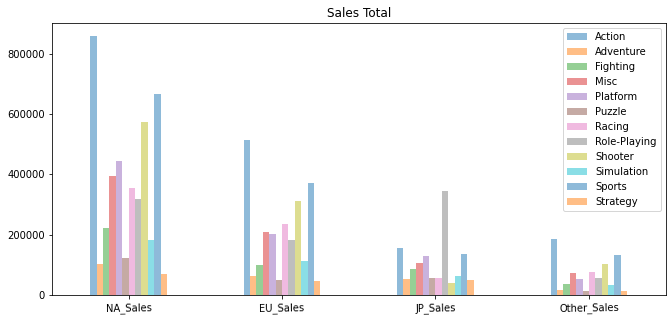

In [219]:
vgames_sum.plot(kind='bar',figsize=(11,5), rot=1, alpha = 0.5, title='Sales Total')
plt.legend(loc='best')

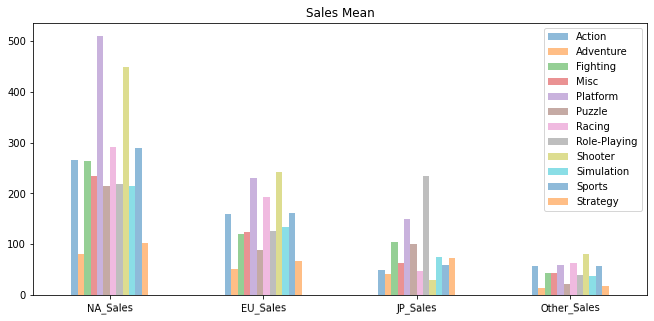

In [220]:
vgames_mean.plot(kind='bar',figsize=(11,5), rot=1, legend='reverse', alpha = 0.5, title='Sales Mean')
plt.legend(loc='best')

In [221]:
vgames_1.rank(method='min', ascending=False)

,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,13002.0,12572.0,9723.0,10635.0,6069.0,9923.0
1,13002.0,6789.0,5093.0,10635.0,6069.0,6555.0
2,11734.0,14613.0,11821.0,10635.0,4659.0,9923.0
3,9218.0,38.0,9723.0,10635.0,6069.0,9923.0
4,8345.0,12822.0,6343.0,4429.0,6069.0,3429.0
...,...,...,...,...,...,...
16593,8345.0,456.0,5508.0,6286.0,6069.0,6555.0
16594,13002.0,5446.0,11300.0,10635.0,6069.0,9923.0
16595,670.0,2250.0,2309.0,2735.0,4137.0,1279.0
16596,13002.0,1907.0,9204.0,5752.0,1206.0,4082.0



|인기종목 |1st | 2nd | 3rd |
|:-:|:-:|:-:|:-:|
|북미|Platform|Shooter|simulation|
|유럽|Shooter|Platform|Racing|
|일본|Role-Playing|Adventure|Fighting|
|그외|Shooter|Racing|Platform|

<br/>

|비인기종목 |1st | 2nd | 3rd |
|:-:|:-:|:-:|:-:|
|북미|Adventure	|Strategy|Sports|
|유럽|Adventure	|Strategy|Puzzle|
|일본|Shooter|Platform|Racing|
|그외|Adventure	|Strategy|Platform|


In [222]:
vgames_sum.T.corr(method = 'pearson')

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
NA_Sales,1.000000,0.986484,0.285377,0.974401
EU_Sales,0.986484,1.000000,0.278428,0.994272
JP_Sales,0.285377,0.278428,1.000000,0.263562
Other_Sales,0.974401,0.994272,0.263562,1.000000


In [223]:
vgames_mean.T.corr(method = 'pearson')

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
NA_Sales,1.000000,0.942317,0.096376,0.848786
EU_Sales,0.942317,1.000000,-0.033686,0.951116
JP_Sales,0.096376,-0.033686,1.000000,-0.150381
Other_Sales,0.848786,0.951116,-0.150381,1.000000


2. 📅연도별 트랜드 변화
</br>장르별

In [224]:
vgames_2_Genre = vgames.iloc[:, 2:4]
vgames_2_Genre['sales'] = vgames.iloc[:, 5:].sum(axis = 1, skipna = True)
vgames_2_Genre

,Year,Genre,sales
0,2008.0,Action,40.0
1,2009.0,Action,180.0
2,2010.0,Adventure,20.0
3,2010.0,Misc,40.0
4,2010.0,Platform,250.0
...,...,...,...
16593,2006.0,Platform,200.0
16594,2005.0,Action,10.0
16595,2015.0,Sports,790.0
16596,2013.0,Action,380.0


In [225]:
pivot_vgames = pd.pivot_table(vgames_2_Genre, 'sales', 'Year', 'Genre', aggfunc='sum', fill_value=0)
#pivot_vgames['sum']=pivot_vgames.sum(axis = 1, skipna = True)
pivot_vgames.head()
pivot_index = pivot_vgames.index
pivot_columns= pivot_vgames.columns
pivot_index

Float64Index([1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0,
              1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0,
              1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0,
              2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0,
              2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2020.0],
             dtype='float64', name='Year')

In [226]:
pivot_sum = np.array(pivot_vgames.sum(axis = 1, skipna = True))
pivot_sum[0]

10880

In [227]:
pivot_array = np.array(pivot_vgames)
array_pivot=pd.DataFrame(pivot_array / pivot_array.sum(1, keepdims=True),
                         index=pivot_index, columns=pivot_columns)
array_pivot.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980.0,0.031250,0.00000,0.070772,0.248162,0.000000,0.000000,0.000000,0.0,0.649816,0.000000,0.000000,0.0
1981.0,0.414518,0.00000,0.000000,0.000000,0.193946,0.063061,0.013453,0.0,0.280830,0.012332,0.021861,0.0
1982.0,0.225069,0.00000,0.000000,0.030125,0.174169,0.347645,0.054363,0.0,0.131925,0.000000,0.036704,0.0
1983.0,0.170238,0.02381,0.000000,0.127381,0.412500,0.046429,0.000000,0.0,0.029167,0.000000,0.190476,0.0
1984.0,0.036743,0.00000,0.000000,0.028798,0.013704,0.062363,0.118173,0.0,0.617676,0.000000,0.122542,0.0


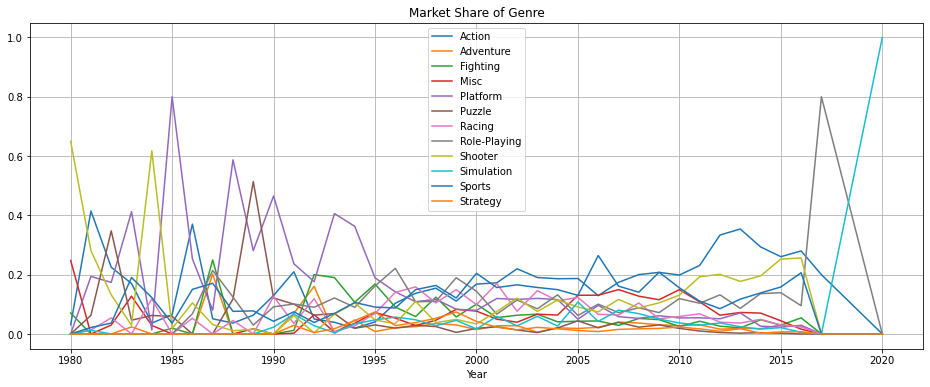

In [228]:
  array_pivot.plot(kind='line', 
                  figsize=(16,6), 
                  title='Market Share of Genre', 
                  grid=True)
  plt.legend(loc='best')

3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [229]:
vgames_3 = vgames.iloc[:,:]
vgames_3['sales'] = vgames.iloc[:, 5:].sum(axis = 1, skipna = True)
vgames_3['rank'] = vgames_3['sales'].rank(method="min", ascending = True)
vgames_3

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sales,rank
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40.0,0.0,0.0,0.0,40.0,2486.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170.0,0.0,0.0,10.0,180.0,8185.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20.0,0.0,20.0,759.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40.0,0.0,0.0,0.0,40.0,2486.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120.0,90.0,0.0,40.0,250.0,9598.0
...,...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,150.0,40.0,0.0,10.0,200.0,8682.0
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,10.0,0.0,0.0,0.0,10.0,2.0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,440.0,190.0,30.0,130.0,790.0,13666.0
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,50.0,50.0,250.0,30.0,380.0,11270.0


In [230]:
vgames_3_rank = vgames_3.sort_values(by='rank', ascending=False)
vgames_3_top100 = vgames_3_rank.iloc[:,:9].head(100).reset_index().iloc[:, 1:]
vgames_3_top100

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41490.0,29020.0,3770.0,8460.0
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29080.0,3580.0,6810.0,770.0
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15850.0,12880.0,3790.0,3310.0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15750.0,11010.0,3280.0,2960.0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11270.0,8890.0,10220.0,1000.0
...,...,...,...,...,...,...,...,...,...
95,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,Nintendo,3240.0,1350.0,2420.0,430.0
96,Call of Duty: World at War,X360,2008.0,Shooter,Activision,4790.0,1900.0,0.0,690.0
97,Battlefield 3,X360,2011.0,Shooter,Electronic Arts,4460.0,2130.0,60.0,690.0
98,The Legend of Zelda: Twilight Princess,Wii,2006.0,Action,Nintendo,3830.0,2190.0,600.0,700.0


([<matplotlib.patches.Wedge at 0x7faa72809210>,
 [Text(0.9639373540021144, 0.5299290306818474, 'X360'),
  Text(0.10351914875166042, 1.0951181606757014, 'Wii'),
  Text(-0.7778174593052023, 0.7778174593052024, 'DS'),
  Text(-1.0951181606757014, 0.10351914875166049, 'PS3'),
  Text(-1.0227541331501238, -0.4049370113046461, '3DS'),
  Text(-0.8018654940411144, -0.7530018123923737, 'PS2'),
  Text(-0.46835723423378606, -0.9953097513542598, 'GB'),
  Text(-0.10351916156820615, -1.0951181594641812, 'PS'),
  Text(0.2399575539776482, -1.0735084407162638, 'PS4'),
  Text(0.5299290306818469, -0.9639373540021147, 'SNES'),
  Text(0.7530018030078659, -0.8018655028537538, 'NES'),
  Text(0.928760704807937, -0.5894094953465411, 'N64'),
  Text(1.0227541236718887, -0.40493703524393426, 'GBA'),
  Text(1.0563230454091976, -0.30689024705493406, 'XOne'),
  Text(1.0735084308871918, -0.23995759795038657, 'PC'),
  Text(1.0864571692171556, -0.17207794587524802, 'XB'),
  Text(1.0951181576469005, -0.10351918079302312, 

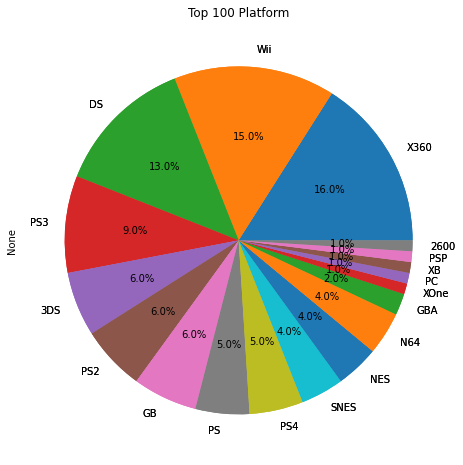

In [231]:
vgames_3_platform=vgames_3_top100.value_counts('Platform')
vgames_3_platform.plot(kind='pie', figsize = (8, 8), title='Top 100 Platform')
vgames_3_values=vgames_3_platform.values
labels=vgames_3_platform.index
plt.pie(vgames_3_values, labels=labels, autopct='%.1f%%')

In [232]:
vgames_3_year=pd.DataFrame(vgames_3_top100.value_counts('Year'))
vgames_3_year.columns = ['counts']
vgames_3_year=vgames_3_year.sort_values(by='Year', ascending=True)
vgames_3_year.head()

,counts
Year,
1982.0,1
1984.0,1
1985.0,1
1988.0,2
1989.0,2


Text(0.5, 1.0, 'year of "top 100"')

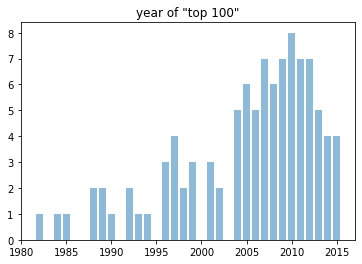

In [233]:
#연도 
plt.bar(vgames_3_year.index,vgames_3_year['counts'], alpha=0.5)
plt.title('year of "top 100"')

In [234]:
top100_genre = vgames_3_top100.value_counts('Genre')

([<matplotlib.patches.Wedge at 0x7faa72791810>,
 [Text(0.8251221670583667, 0.7274430626715089, 'Shooter'),
  Text(-0.4049370232742901, 1.0227541284110062, 'Platform'),
  Text(-1.0654414787782402, 0.2735588698961104, 'Role-Playing'),
  Text(-0.9097886363331101, -0.6182917088228987, 'Action'),
  Text(-0.2735588948345678, -1.0654414723751324, 'Racing'),
  Text(0.3399186742226881, -1.0461621742897658, 'Misc'),
  Text(0.7530017936233573, -0.8018655116663935, 'Sports'),
  Text(0.9639373291943449, -0.5299290758070114, 'Simulation'),
  Text(1.0563230418175553, -0.3068902594174461, 'Puzzle'),
  Text(1.0913261653791653, -0.13786660494408046, 'Fighting'),
  Text(1.0994572148090778, -0.03455188568320856, 'Adventure')],
 [Text(0.4500666365772909, 0.3967871250935503, '23.0%'),
  Text(-0.22087473996779458, 0.5578658882241851, '16.0%'),
  Text(-0.5811498975154037, 0.14921392903424202, '14.0%'),
  Text(-0.4962483470907873, -0.33725002299430834, '13.0%'),
  Text(-0.14921394263703697, -0.5811498940227995

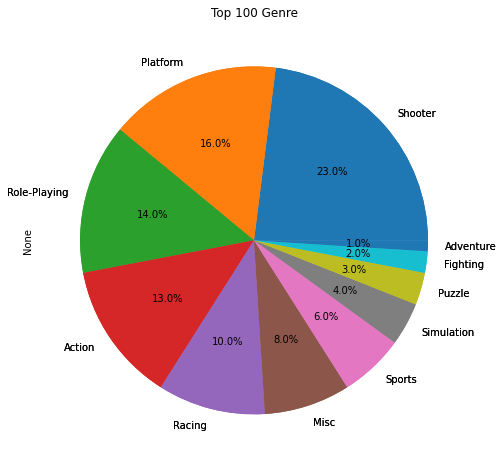

In [235]:
# 장르 파이
top100_genre .plot(kind='pie', figsize = (8, 8), title='Top 100 Genre')
top100_genre_values=top100_genre.values
labels=top100_genre .index
plt.pie(top100_genre_values, labels=labels, autopct='%.1f%%')

In [236]:
vgames_3_top100.value_counts('Publisher')

Publisher
Nintendo                       51
Activision                     15
Take-Two Interactive            9
Sony Computer Entertainment     8
Microsoft Game Studios          6
Electronic Arts                 5
Ubisoft                         2
SquareSoft                      1
Sega                            1
Bethesda Softworks              1
Atari                           1
dtype: int64

In [237]:
vgames_3_publisher = pd.DataFrame(vgames_3_top100.value_counts('Publisher').head(6))
data = {'others': [6]}
data = pd.DataFrame(data).T
vgames_3_publisher = pd.concat([vgames_3_publisher, data])
vgames_3_publisher_array = np.array(pd.concat([vgames_3_publisher, data]))
vgames_3_publisher.columns = ['counts']
vgames_3_publisher.index=['Nintendo', 'Activision', 'Take-Two',
                          'Sony', 'Microsoft', 'EA', 'others']

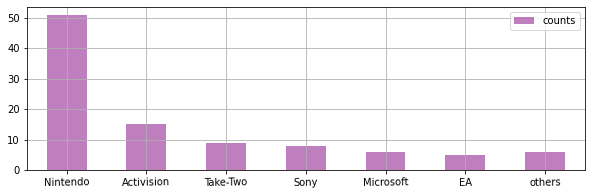

In [238]:
#top 100 배급사 그래프

vgames_3_publisher.plot(kind='bar', stacked=True, rot=1, figsize=(10, 3), color = 'purple',grid=True,  alpha=0.5 )

In [239]:
vgames_3_top100_sum= vgames_3_top100.groupby(['Genre']).sum()
vgames_3_top100_sum=vgames_3_top100_sum.iloc[:, 1:].T
vgames_3_top100_sum

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports
NA_Sales,73080.0,6160.0,9990.0,59490.0,138080.0,33920.0,60210.0,71740.0,160140.0,14610.0,78960.0
EU_Sales,52380.0,2040.0,3960.0,36450.0,54820.0,8070.0,44810.0,50590.0,74370.0,23260.0,66610.0
JP_Sales,9530.0,2690.0,5080.0,10920.0,46640.0,9540.0,24640.0,59410.0,4430.0,11620.0,13900.0
Other_Sales,29230.0,290.0,1450.0,10620.0,12400.0,1840.0,18280.0,9340.0,25940.0,4750.0,17530.0


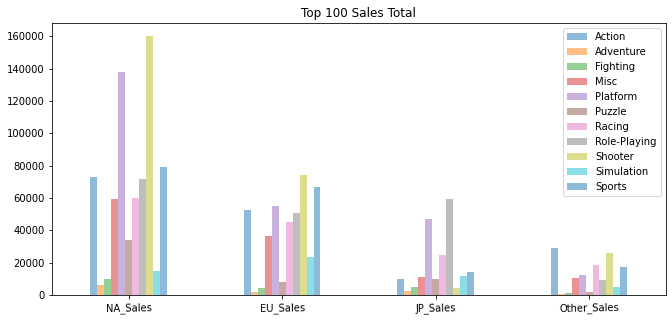

In [240]:
vgames_3_top100_sum.plot(kind='bar',figsize=(11,5), rot=1, legend='reverse', alpha = 0.5, title='Top 100 Sales Total')
plt.legend(loc='best')

In [241]:
vgames_3_top100_mean= vgames_3_top100.groupby(['Genre']).mean()
vgames_3_top100_mean=vgames_3_top100_mean.iloc[:, 1:].T
vgames_3_top100_mean

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports
NA_Sales,5621.538462,6160.0,4995.0,7436.25,8630.00,11306.666667,6021.0,5124.285714,6962.608696,3652.5,13160.000000
EU_Sales,4029.230769,2040.0,1980.0,4556.25,3426.25,2690.000000,4481.0,3613.571429,3233.478261,5815.0,11101.666667
JP_Sales,733.076923,2690.0,2540.0,1365.00,2915.00,3180.000000,2464.0,4243.571429,192.608696,2905.0,2316.666667
Other_Sales,2248.461538,290.0,725.0,1327.50,775.00,613.333333,1828.0,667.142857,1127.826087,1187.5,2921.666667


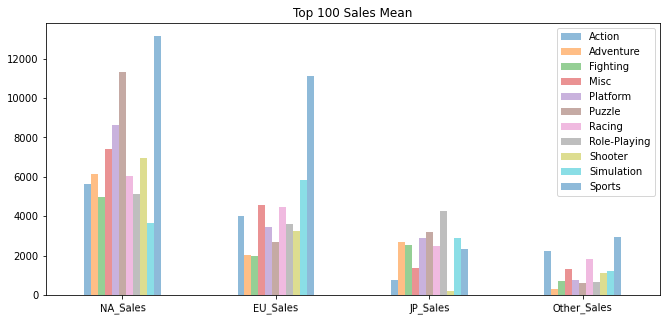

In [242]:
vgames_3_top100_mean.plot(kind='bar',figsize=(11,5), rot=1, legend='reverse', alpha = 0.5, title='Top 100 Sales Mean')
plt.legend(loc='best')

# 💦개인과제💦

[링크 텍스트](https://)3-2를 토대로 최근  자료 분석

In [243]:
#2010년부터 자료
vgames08 = vgames[vgames.Year > 2009]
vgames08.shape

(5120, 11)

In [244]:
#상위 10%
vgames08_rank = vgames08.iloc[:, :10]
vgames08_rank['rank'] = vgames08_rank['sales'].rank(method="min", ascending = True)
vgames08_10per = vgames08_rank.sort_values(by='rank', ascending=False)
vgames08_10per = vgames08_10per.iloc[:, :10].reset_index()
vgames08_10per = vgames08_10per.head(512)
vgames08_10per

,index,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sales
0,4343,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14970.0,4940.0,240.0,1670.0,21820.0
1,3483,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7010.0,9270.0,970.0,4140.0,21390.0
2,10913,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9630.0,5310.0,60.0,1380.0,16380.0
3,10621,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,Nintendo,5570.0,3280.0,5650.0,820.0,15320.0
4,2809,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9030.0,4280.0,130.0,1320.0,14760.0
...,...,...,...,...,...,...,...,...,...,...,...
507,3149,LEGO The Lord of the Rings,PS3,2012.0,Action,Warner Bros. Interactive Entertainment,360.0,530.0,0.0,210.0,1100.0
508,6614,Sunset Overdrive,XOne,2014.0,Shooter,Microsoft Game Studios,620.0,400.0,0.0,80.0,1100.0
509,4159,Toy Story 3: The Video Game,PS3,2010.0,Action,Disney Interactive Studios,510.0,420.0,0.0,170.0,1100.0
510,12344,The Legend of Zelda: Tri Force Heroes,3DS,2015.0,Action,Nintendo,520.0,330.0,170.0,80.0,1100.0


In [245]:
#상위 10퍼 장르 총합

vgames08_sum= vgames08_10per.groupby(['Genre']).sum()
vgames08_sum= vgames08_sum.iloc[:, 1:5]
vgames08_sum= vgames08_sum.T
vgames08_sum

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,287744.0,14086.0,32191.0,60358.0,62375.0,8045.0,50300.0,130800.0,197247.0,26153.0,146911.0,14079.0
NA_Sales,165740.0,6240.0,18560.0,66690.0,41710.0,3590.0,26030.0,70190.0,186120.0,11140.0,86590.0,6830.0
EU_Sales,142470.0,6320.0,8420.0,37570.0,27530.0,2140.0,32190.0,49960.0,129590.0,14590.0,78810.0,4800.0
JP_Sales,21470.0,460.0,3670.0,4920.0,14430.0,900.0,5880.0,49530.0,9820.0,8390.0,3320.0,290.0


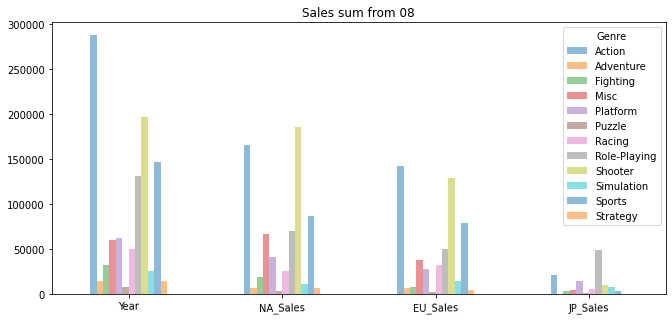

In [246]:
vgames08_sum.plot(kind='bar',figsize=(11,5), rot=1, alpha = 0.5, title='Sales sum from 08')

In [247]:
#상위 10퍼 장르 평균

vgames08_mean= vgames08_10per.groupby(['Genre']).mean()
vgames08_mean= vgames08_mean.iloc[:, 2:6]
vgames08_mean= vgames08_mean.T

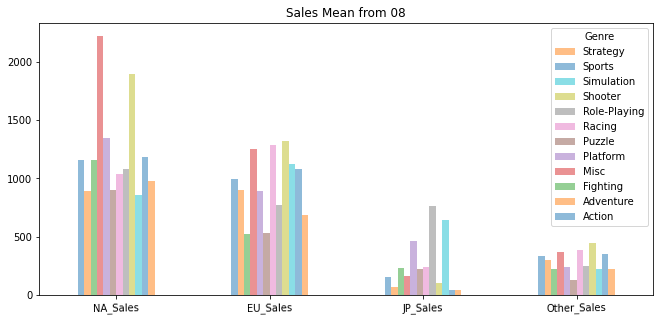

In [248]:
vgames08_mean.plot(kind='bar',figsize=(11,5), rot=1, legend='reverse', alpha = 0.5, title='Sales Mean from 08')

베이지안 정리
 </br>
#1. 장르

In [267]:
total_genre = vgames08['Genre'].value_counts()
total_sum = total_genre.sum()
total_sum

5120

In [429]:
top10_10 = pd.DataFrame(vgames08_10per['Genre'].value_counts())

genre_ratio = pd.concat([total_genre, top10_10], axis=1, join='inner')
genre_ratio.columns=['total','top10%']
genre_ratio['ratio'] = genre_ratio['total'] / total_sum

In [430]:
#사전 확률 (genre 별)
genre_ratio

,total,top10%,ratio
Action,1434,143,0.280078
Sports,569,73,0.111133
Misc,561,30,0.109570
Role-Playing,556,65,0.108594
Adventure,538,7,0.105078
Shooter,395,98,0.077148
Racing,233,25,0.045508
Simulation,206,13,0.040234
Fighting,196,16,0.038281
Strategy,167,7,0.032617


사전확률 (10%) 확률은</br>
P(Yes) : 512 / 5120 = 0.1</br>
P(No) :  4608 / 5120 = 0.9



In [431]:
#사전확률
piror_genre = pd.DataFrame(total_genre/total_sum)

In [432]:
piror_genre['yes'] = piror['top10%'] / 512
piror_genre

,Genre,yes
Action,0.280078,0.279297
Sports,0.111133,0.142578
Misc,0.109570,0.058594
Role-Playing,0.108594,0.126953
Adventure,0.105078,0.013672
Shooter,0.077148,0.191406
Racing,0.045508,0.048828
Simulation,0.040234,0.025391
Fighting,0.038281,0.031250
Strategy,0.032617,0.013672


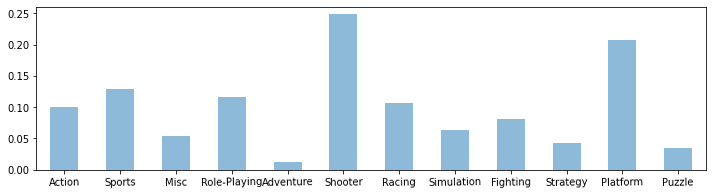

In [433]:
#P(No | Cool) : P(No) P(Cool | No) / P(Cool)

piror_genre['bayesian'] = (0.1 * piror_genre['yes']) / genre_ratio['ratio']
piror_genre['bayesian'].plot(kind='bar', rot=1, figsize = (12, 3), alpha=0.5)

In [437]:
pd.DataFrame(piror_genre['bayesian']).sort_values(by='bayesian', ascending=False).head()

,bayesian
Shooter,0.248101
Platform,0.206667
Sports,0.128295
Role-Playing,0.116906
Racing,0.107296


# 2. 플랫폼

In [413]:
total_plat = vgames08['Platform'].value_counts()
top10_plat = pd.DataFrame(vgames08_10per['Platform'].value_counts())

5120

In [436]:
plat_ratio = pd.concat([total_plat, top10_plat], axis=1, join='inner')
plat_ratio.columns=['total','top10%']
plat_ratio['ratio'] = plat_ratio['total'] / total_plat.sum()
total_plat_sum = plat_ratio['total'].sum()
plat_ratio.head()

,total,top10%,ratio
PS3,884,132,0.172656
X360,680,120,0.132812
DS,512,17,0.100000
PSP,499,4,0.097461
3DS,498,45,0.097266


In [418]:
piror_plat = pd.DataFrame(plat_ratio['total']/total_plat_sum)
piror_plat['yes'] = plat_ratio['top10%'] / 512
piror_plat['bayesian']  = (0.1 * piror_plat['yes']) / plat_ratio['ratio']
piror_plat = piror_plat.sort_values(by='bayesian', ascending=False).head()
pd.DataFrame(piror_plat['bayesian'].head())

,bayesian
PS4,0.200000
XOne,0.198113
X360,0.176471
PS3,0.149321
WiiU,0.111888


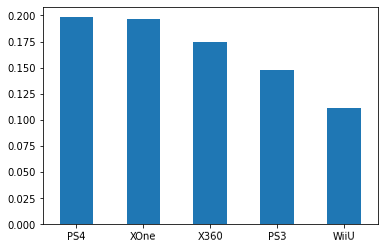

In [411]:
piror_plat['bayesian'].plot(kind="bar", rot=1)

# 4. naive baseyan
</br>
 P( X | top100 ) = P(Shooter | top100) * P(PS4 | top100) / P(X)<br>
= 0.248101 * 0.198320 </br>
 P(top100) P(X | top100) / P(X)


In [441]:
(0.1 * (0.248101 * 0.2)) / (0.280078 * 0.172656) *100

20.52238517198377